### Matriz de Gradiente de Deformación, Matriz de Gradiente de Desplazamiento y Tensor de Deformación. 
#### Clase de Mecánica de Sólidos,   R. Zúñiga  2010-1. (Consultar la pag. https://courses.eas.ualberta.ca/eas421/lecturepages/straintensors.html como información complementaria).
#### (Para correr teclear "Shift-Enter" en cada celda)
#### Si se corre desde Julia Box se puede correr sin cambios, si se corre desde una instalación local de Julia se deben correr las siguientes entradas:
#### Pkg.add("Plots")
#### Pkg.add("LinearAlgebra")

In [2]:
#using Pkg
#Pkg.add("LinearAlgebra")
#Pkg.add("Plots")
using Plots
using LinearAlgebra

#### Definamos un punto o vector de posición, que llamamos x, por ejemplo:
 $ x = \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] $

In [8]:
x = [1.0,1.0]

2-element Array{Float64,1}:
 1.0
 1.0

### Vamos a trabajar ahora con una matriz de Gradiente de Deformación. 
#### La siguiente es una "Cizalla simple¨ con valores de ejemplo
$
   F=
  \left[ {\begin{array}{cc}
   2.0 & 1.0 \\
   0.0 & 2.0 \\
  \end{array} } \right]
$

In [7]:
F = [ 2.0 1.0
      0.0 2.0]

2×2 Array{Float64,2}:
 2.0  1.0
 0.0  2.0

#### Un caso de "Cizalla pura", sería como sigue:
$
   F=
  \left[ {\begin{array}{cc}
   2.0 & 0.0 \\
   0.0 & 3.0 \\
  \end{array} } \right]
$

In [9]:
FP = [ 2.0 0.0
0.0 3.0]       # caso de cizalla pura

2×2 Array{Float64,2}:
 2.0  0.0
 0.0  3.0

### Usando la matriz de cizalla simple podemos calcular una matriz de "Gradiente de Desplazamiento" (la matriz que especificamos como J) como sigue:
$
   J= F - I=
  \left[ {\begin{array}{cc}
   2.0 & 1.0 \\
   0.0 & 2.0 \\
  \end{array} } \right]-
  \left[ {\begin{array}{cc}
   1.0 & 0.0 \\
   0.0 & 1.0 \\
  \end{array} } \right]=
  \left[ {\begin{array}{cc}
   1.0 & 1.0 \\
   0.0 & 1.0 \\
  \end{array} } \right]
$

In [10]:
J = (F-I)

2×2 Array{Float64,2}:
 1.0  1.0
 0.0  1.0

### y ahora podemos encontrar la posición del punto x desplazado a x´ durante una cizalla simple:
 $
 x'= [J] x = 
  \left[ {\begin{array}{cc}
  1.0 & 1.0 \\
   0.0 & 1.0 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] =
   \left[ {\begin{array}{c}
  2.0 \\
   1.0 \\
  \end{array} } \right] 
  $

In [11]:
xp = J*x

2-element Array{Float64,1}:
 2.0
 1.0

### Ahora veamos qué pasa con los puntos que forman un cuadrado con un vértice en el origen

In [12]:
x1 = [1.0,1.0]; x2 = [1.0,0.0]; x3 = [0.0,0.0]; x4 = [0.0,1.0];
X = [x1'; x2'; x3'; x4' ; x1' ]

5×2 Array{Float64,2}:
 1.0  1.0
 1.0  0.0
 0.0  0.0
 0.0  1.0
 1.0  1.0

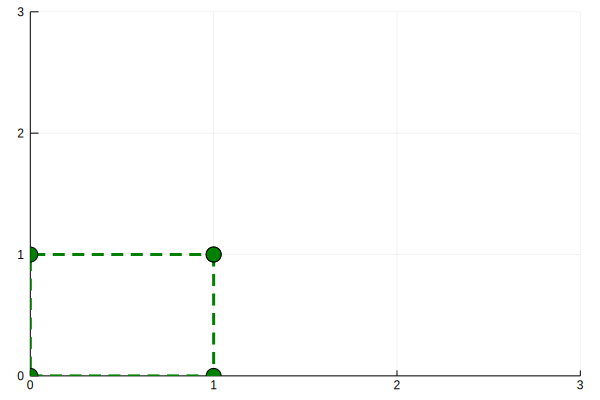

In [13]:
p1 = plot(X[:,1],X[:,2], line=(3,:dash,:green),m=(8,:green), leg = false, xlims = (0,3), ylims = (0,3))

### transformando con la matriz de Gradiente de Desplazamiento de cizalla simple
$
 x1'= [J] x1 = 
  \left[ {\begin{array}{cc}
  1.0 & 1.0 \\
   0.0 & 1.0 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] =
   \left[ {\begin{array}{c}
  2.0 \\
   1.0 \\
  \end{array} } \right] 
  $
  ### y así sucesivamente con cada punto

In [14]:
x1p = J*x1; x2p = J*x2; x3p = J*x3; x4p = J*x4;
XP = [x1p'; x2p'; x3p'; x4p' ; x1p']

5×2 Array{Float64,2}:
 2.0  1.0
 1.0  0.0
 0.0  0.0
 1.0  1.0
 2.0  1.0

### El resultado es el cudrado rojo con los puntos desplazados, el verde son los puntos originales 

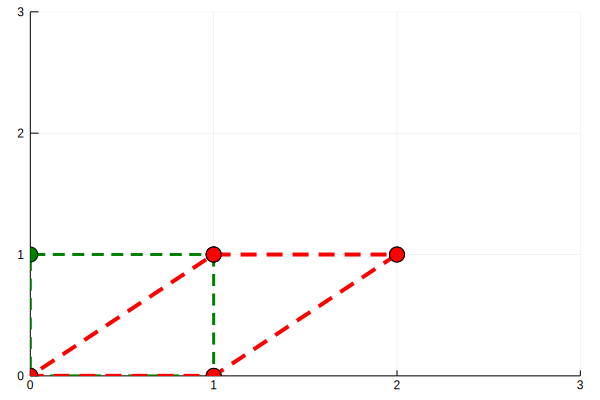

In [15]:
p1 = plot(X[:,1],X[:,2], line=(3,:dash,:green),m=(8,:green), leg = false, xlims = (0,3), ylims = (0,3))
plot!(XP[:,1],XP[:,2],line=(4,:dash,:red),m=(8,:red), xlims = (0,3), ylims = (0,3))

### Ahora veamos qué pasa al transformar con la matriz de Gradiente de Deformación
$
 x1'= [F] x1 = 
  \left[ {\begin{array}{cc}
  2.0 & 1.0 \\
   0.0 & 2.0 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] =
   \left[ {\begin{array}{c}
  3.0 \\
   2.0 \\
  \end{array} } \right] 
  $
  ### y así sucesivamente con cada punto

In [16]:
x1pp = F*x1; x2pp = F*x2; x3pp = F*x3; x4pp = F*x4;
XPP = [x1pp'; x2pp'; x3pp'; x4pp'; x1pp' ]

5×2 Array{Float64,2}:
 3.0  2.0
 2.0  0.0
 0.0  0.0
 1.0  2.0
 3.0  2.0

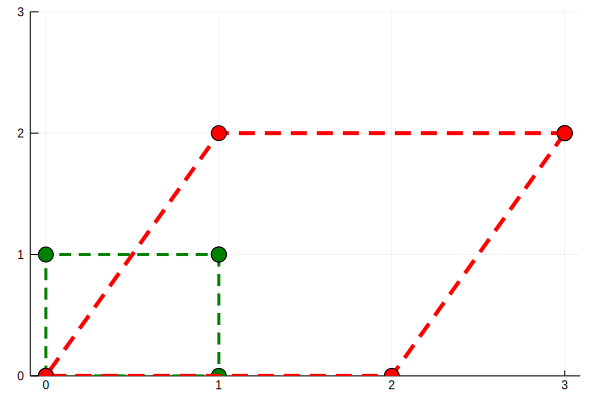

In [17]:
p1 = plot(X[:,1],X[:,2], line=(3,:dash,:green),m=(8,:green))
plot!(XPP[:,1],XPP[:,2],line=(4,:dash,:red),m=(8,:red), leg = false, ylims = ((0,3)))

### Podemos ver que además de la cizalla, se produce un cambio de volumen (expansión)

## Tensor de Deformación
### Vamos a crear un tensor de Deformación, promediando los valores fuera de la diagonal de la matriz de Gradiente de Deformación, de manera que sea simétrica, es decir:
$
   D=
  \left[ {\begin{array}{cc}
   2.0 & (1.0+0.0)/2 \\
   (1.0+0.0)/2 & 2.0 \\
  \end{array} } \right] = 
  \left[ {\begin{array}{cc}
   2.0 & 0.5 \\
   0.5 & 2.0 \\
  \end{array} } \right] 
$
### Notar que esta matriz es simétrica, mientras que las anteriores no lo son

In [18]:
D = [ 2.0 (F[1,2]+F[2,1])/2
      (F[1,2]+F[2,1])/2 2.0]

2×2 Array{Float64,2}:
 2.0  0.5
 0.5  2.0

### Y ahora transformamos nuestro cuadrado usando el Tensor de Deformación, y vemos qué pasa
$
 x1''= [D] x1 = 
  \left[ {\begin{array}{cc}
  2.0 & 0.5 \\
   0.5 & 2.0 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] =
   \left[ {\begin{array}{c}
  2.5 \\
   2.5 \\
  \end{array} } \right] 
  $
  ### y así sucesivamente con cada punto

In [19]:
x1pp = D*x1; x2pp = D*x2; x3pp = D*x3; x4pp = D*x4;
XPP = [x1pp'; x2pp'; x3pp'; x4pp'; x1pp' ]

5×2 Array{Float64,2}:
 2.5  2.5
 2.0  0.5
 0.0  0.0
 0.5  2.0
 2.5  2.5

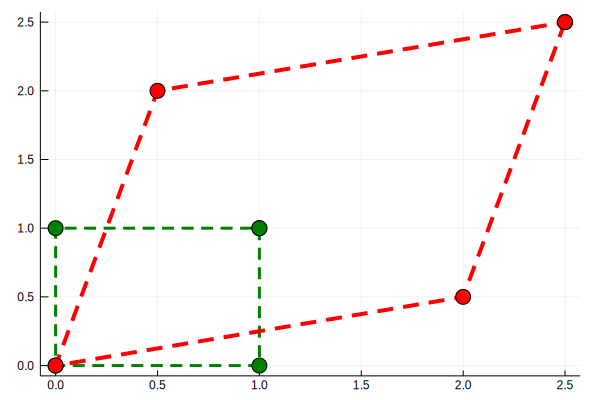

In [20]:
p1 = plot(X[:,1],X[:,2], line=(3,:dash,:green),m=(8,:green))
plot!(XPP[:,1],XPP[:,2],line=(4,:dash,:red),m=(8,:red), leg = false)

### Puede verse que se obtendría el mismo caso de cizalla simple, pero añadiendo una pequeña rotación